In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Primer dataframe

### Adquisición de Datos

In [2]:
response = requests.get('https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=ML&format=json')

In [3]:
response

<Response [200]>

In [4]:
mlen = pd.DataFrame(response.json())

-------------------------------------------------

### Evaluación

In [5]:
mlen.head()

,pl_name,rastr,decstr,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massj,pl_massjerr1,pl_massjerr2,...,ml_radeinang,ml_radeinangerr1,ml_radeinangerr2,ml_radeinanglim,ml_pmrells,ml_pmrellserr1,ml_pmrellserr2,ml_pmrellslim,ml_modeldef,htmllink
0,KMT-2019-BLG-1953L b,17h56m27.90s,-28d12m04.00s,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.250,0.020,-0.020,0.0,5.70,0.46,-0.46,0.0,0,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...
1,MOA-2013-BLG-605L b,17h58m42.85s,-29d23m53.66s,20.58,0.56,-6.66,0,0.06475,0.0018,-0.021,...,0.503,0.034,-0.034,0.0,9.03,0.63,-0.63,0.0,0,<a refstr=SUMI_ET_AL__2016 href=https://ui.ads...
2,KMT-2019-BLG-1953L b,17h56m27.90s,-28d12m04.00s,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0.250,0.020,-0.020,0.0,5.70,0.46,-0.46,0.0,0,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...
3,OGLE-2005-BLG-390L b,17h54m19.2s,-30d22m38s,5.50,5.50,-2.70,0,0.01700,0.0170,-0.009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,<a refstr=BEAULIEU_ET_AL__2006 href=https://ui...
4,OGLE-2012-BLG-0950L b,18h08m04.62s,-29d43m53.7s,36.00,8.00,-6.00,0,0.11000,0.0300,-0.020,...,0.860,0.150,-0.060,0.0,4.60,0.90,-0.30,0.0,0,<a refstr=KOSHIMOTO_ET_AL__2017 href=https://u...


In [6]:
mlen.shape

(331, 73)

In [7]:
mlen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 73 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pl_name            331 non-null    object 
 1   rastr              331 non-null    object 
 2   decstr             331 non-null    object 
 3   pl_masse           299 non-null    float64
 4   pl_masseerr1       296 non-null    float64
 5   pl_masseerr2       296 non-null    float64
 6   pl_masselim        331 non-null    int64  
 7   pl_massj           299 non-null    float64
 8   pl_massjerr1       296 non-null    float64
 9   pl_massjerr2       296 non-null    float64
 10  pl_massjlim        331 non-null    int64  
 11  pl_orbsmax         296 non-null    float64
 12  pl_orbsmaxerr1     271 non-null    float64
 13  pl_orbsmaxerr2     271 non-null    float64
 14  pl_orbsmaxlim      330 non-null    float64
 15  st_mass            301 non-null    float64
 16  st_masserr1        298 non

In [8]:
mlen.isnull().sum()

pl_name            0
rastr              0
decstr             0
pl_masse          32
pl_masseerr1      35
                  ..
ml_pmrellserr1    89
ml_pmrellserr2    89
ml_pmrellslim     75
ml_modeldef        0
htmllink           0
Length: 73, dtype: int64

In [9]:
mlen.columns

Index(['pl_name', 'rastr', 'decstr', 'pl_masse', 'pl_masseerr1',
       'pl_masseerr2', 'pl_masselim', 'pl_massj', 'pl_massjerr1',
       'pl_massjerr2', 'pl_massjlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'st_mass', 'st_masserr1',
       'st_masserr2', 'st_masslim', 'sy_dist', 'sy_disterr1', 'sy_disterr2',
       'sy_distlim', 'ml_dists', 'ml_distserr1', 'ml_distserr2', 'ml_distslim',
       'ml_tsepmin', 'ml_tsepminerr1', 'ml_tsepminerr2', 'ml_tsepminlim',
       'ml_sepminnorm', 'ml_sepminnormerr1', 'ml_sepminnormerr2',
       'ml_sepminnormlim', 'ml_xtimeein', 'ml_xtimeeinerr1', 'ml_xtimeeinerr2',
       'ml_xtimeeinlim', 'ml_radsnorm', 'ml_radsnormerr1', 'ml_radsnormerr2',
       'ml_radsnormlim', 'ml_sepinsnorp', 'ml_sepinsnorperr1',
       'ml_sepinsnorperr2', 'ml_sepinsnorplim', 'ml_massratio',
       'ml_massratioerr1', 'ml_massratioerr2', 'ml_massratiolim',
       'ml_angstlax', 'ml_angstlaxerr1', 'ml_angstlaxerr2', 'ml_angstlaxlim',
     

### Documentación

Como se puede observar los nombres de cada una de las columnas no son intuitivos. Se puede visitar la siguiente documentación para una explicación de el significado de cada una de las columnas y lo que representa:

https://exoplanetarchive.ipac.caltech.edu/docs/API_ML.html
https://exoplanetarchive.ipac.caltech.edu/docs/microlensing-column-mapping.pdf

Sin embargo solo seran seleccionadas las listadas a continuación:

- **pl_name:** Planet Name (Planet name)
- **rastr:** RA (Right ascension of the microlensing event, in sexagesimal format
- **decstr:** Declination of the microlensing event, in sexagesimal format
- **pl_masse:** Mass of planet, in Earth masses
- **pl_massj:** Planet Mass (Mass of planet, in Jupiter masses)
- **pl_orbsmax** Planet-star Projected Semi-major Axis, unidad = Astronomical unit (au) 
- **sy_dist:** Lens Distance, unit = Parsec (pc)
- **ml_dists:** Source Distance, unit = Parsec (pc)
- **ml_xtimeein:** Einstein Crossing Time [days]  
- **ml_massratio:** Planet-star Mass Ratio (10^-4)
- **ml_magis:** Source I-band unit = mag 
- **ml_radeinang:** Angular Einstein Radius, unit = mas 
 
 
 


De la siguiente manera se pueden seleccionar las columnas especificadas anteriormente.

### Wrangling

In [10]:
to_keep = ['pl_name', 'rastr', 'decstr', 'pl_masse', 'pl_massj', 'pl_orbsmax', 'sy_dist',
           'ml_dists', 'ml_xtimeein', 'ml_massratio', 'ml_magis', 'ml_radeinang']

Nos aseguramos de que esten bien los nombres

In [11]:
mlen = mlen[to_keep]

In [12]:
mlen.head(3)

,pl_name,rastr,decstr,pl_masse,pl_massj,pl_orbsmax,sy_dist,ml_dists,ml_xtimeein,ml_massratio,ml_magis,ml_radeinang
0,KMT-2019-BLG-1953L b,17h56m27.90s,-28d12m04.00s,NaN,NaN,NaN,NaN,8000.0,16.18,19.100,20.680,0.250
1,MOA-2013-BLG-605L b,17h58m42.85s,-29d23m53.66s,20.58,0.06475,4.18,3550.0,NaN,19.83,3.124,18.112,0.503
2,KMT-2019-BLG-1953L b,17h56m27.90s,-28d12m04.00s,NaN,NaN,NaN,NaN,8000.0,16.02,18.200,20.680,0.250


**Cambiando los nombres a las columnas por nombres más intuitivos**

In [13]:
mlen.columns

Index(['pl_name', 'rastr', 'decstr', 'pl_masse', 'pl_massj', 'pl_orbsmax',
       'sy_dist', 'ml_dists', 'ml_xtimeein', 'ml_massratio', 'ml_magis',
       'ml_radeinang'],
      dtype='object')

In [14]:
len(mlen.columns)

12

In [15]:
mlen.columns

Index(['pl_name', 'rastr', 'decstr', 'pl_masse', 'pl_massj', 'pl_orbsmax',
       'sy_dist', 'ml_dists', 'ml_xtimeein', 'ml_massratio', 'ml_magis',
       'ml_radeinang'],
      dtype='object')

In [16]:
new_names = ['planet_name',  'ra_event', 'dec_event', 'earth_massses', 'jupiter_masses', 
              'planet_orbmax', 'lens_distance', 'source_distance', 'einstein_cross_time', 'source_mag',
             'planet_star_mass_ratio', 'angular_einstein_radius']

In [17]:
old_names = [name for name in mlen.columns]
len(old_names)

12

In [18]:
len(new_names)

12

In [19]:
dict_names = (dict(zip(old_names, new_names)))

In [20]:
mlen.rename(columns=dict_names, inplace=True)

In [21]:
mlen.head(2)

,planet_name,ra_event,dec_event,earth_massses,jupiter_masses,planet_orbmax,lens_distance,source_distance,einstein_cross_time,source_mag,planet_star_mass_ratio,angular_einstein_radius
0,KMT-2019-BLG-1953L b,17h56m27.90s,-28d12m04.00s,NaN,NaN,NaN,NaN,8000.0,16.18,19.100,20.680,0.250
1,MOA-2013-BLG-605L b,17h58m42.85s,-29d23m53.66s,20.58,0.06475,4.18,3550.0,NaN,19.83,3.124,18.112,0.503


#### Transformando lens_distance and source_distance de parsecs a años luz y agregandolos como nuevas columnas

In [22]:
mlen['lens_distance_ly'] = mlen['lens_distance'] * 3.262

In [23]:
mlen['source_distance_ly'] = mlen['source_distance'] * 3.262

In [24]:
mlen.head(2)

,planet_name,ra_event,dec_event,earth_massses,jupiter_masses,planet_orbmax,lens_distance,source_distance,einstein_cross_time,source_mag,planet_star_mass_ratio,angular_einstein_radius,lens_distance_ly,source_distance_ly
0,KMT-2019-BLG-1953L b,17h56m27.90s,-28d12m04.00s,NaN,NaN,NaN,NaN,8000.0,16.18,19.100,20.680,0.250,NaN,26096.0
1,MOA-2013-BLG-605L b,17h58m42.85s,-29d23m53.66s,20.58,0.06475,4.18,3550.0,NaN,19.83,3.124,18.112,0.503,11580.1,NaN


### Revisando valores duplicados

In [25]:
mlen['planet_name'].value_counts()

OGLE-2015-BLG-0966L b    16
OGLE-2012-BLG-0950L b    12
KMT-2018-BLG-1990L b     11
OGLE-2016-BLG-1195L b    10
KMT-2016-BLG-1836L b      7
                         ..
MOA-2012-BLG-006L b       1
OGLE-2019-BLG-0954L b     1
OGLE-2017-BLG-1522L b     1
KMT-2016-BLG-1820L b      1
OGLE-2008-BLG-355L b      1
Name: planet_name, Length: 114, dtype: int64

In [26]:
mlen.loc[mlen['planet_name'] == 'OGLE-2015-BLG-0966L b']

,planet_name,ra_event,dec_event,earth_massses,jupiter_masses,planet_orbmax,lens_distance,source_distance,einstein_cross_time,source_mag,planet_star_mass_ratio,angular_einstein_radius,lens_distance_ly,source_distance_ly
39,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.7,3300.0,8000.0,57.7,1.67,NaN,0.76,10764.6,26096.0
41,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.1,2500.0,4500.0,57.7,1.67,NaN,0.76,8155.0,14679.0
48,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.1,2500.0,4500.0,57.7,1.68,NaN,0.76,8155.0,14679.0
78,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.1,2500.0,4500.0,57.7,1.70,NaN,0.76,8155.0,14679.0
102,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.1,2500.0,4500.0,57.8,1.70,NaN,0.76,8155.0,14679.0
110,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.7,3300.0,8000.0,57.7,1.70,NaN,0.76,10764.6,26096.0
140,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.7,3300.0,8000.0,57.7,1.68,NaN,0.76,10764.6,26096.0
145,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.7,3300.0,8000.0,57.7,1.70,NaN,0.76,10764.6,26096.0
146,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.1,2500.0,4500.0,57.7,1.70,NaN,0.76,8155.0,14679.0
184,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.7,3300.0,8000.0,57.8,1.67,NaN,0.76,10764.6,26096.0


In [27]:
mlen.drop_duplicates('planet_name', inplace=True)

In [28]:
mlen.loc[mlen['planet_name'] == 'OGLE-2015-BLG-0966L b']

,planet_name,ra_event,dec_event,earth_massses,jupiter_masses,planet_orbmax,lens_distance,source_distance,einstein_cross_time,source_mag,planet_star_mass_ratio,angular_einstein_radius,lens_distance_ly,source_distance_ly
39,OGLE-2015-BLG-0966L b,17h55m01.02s,-29d02m49.6s,21.0,0.066,2.7,3300.0,8000.0,57.7,1.67,NaN,0.76,10764.6,26096.0


In [29]:
mlen['planet_name'].value_counts()

OGLE-2011-BLG-0173L b    1
MOA-2013-BLG-220L b      1
OGLE-2013-BLG-0102L b    1
OGLE-2018-BLG-0740L b    1
KMT-2016-BLG-1820L b     1
                        ..
OGLE-2018-BLG-0677L b    1
OGLE-2012-BLG-0950L b    1
MOA-2016-BLG-319L b      1
KMT-2018-BLG-0029L b     1
OGLE-2008-BLG-355L b     1
Name: planet_name, Length: 114, dtype: int64

Puede leer la siguiente documentación para entender porque se le da el siguiente formato a ra_event y dec_event

https://www.ing.iac.es//Astronomy/telescopes/wht/catformat.html

In [30]:
mlen['ra_event'] = mlen['ra_event'].str.replace(r'[hm]', ' ', regex=True).str.replace(r's', '', regex=True)

In [31]:
mlen['ra_event'] = mlen['ra_event'].str.strip()

In [32]:
mlen['dec_event'] = mlen['dec_event'].str.replace(r'[dm]', ' ', regex=True).str.replace(r's', '', regex=True)

In [33]:
mlen.head()

,planet_name,ra_event,dec_event,earth_massses,jupiter_masses,planet_orbmax,lens_distance,source_distance,einstein_cross_time,source_mag,planet_star_mass_ratio,angular_einstein_radius,lens_distance_ly,source_distance_ly
0,KMT-2019-BLG-1953L b,17 56 27.90,-28 12 04.00,NaN,NaN,NaN,NaN,8000.0,16.18,19.100,20.680,0.250,NaN,26096.00
1,MOA-2013-BLG-605L b,17 58 42.85,-29 23 53.66,20.58,0.06475,4.18,3550.0,NaN,19.83,3.124,18.112,0.503,11580.10,NaN
3,OGLE-2005-BLG-390L b,17 54 19.2,-30 22 38,5.50,0.01700,2.60,6600.0,8000.0,11.03,0.760,NaN,NaN,21529.20,26096.00
4,OGLE-2012-BLG-0950L b,18 08 04.62,-29 43 53.7,36.00,0.11000,2.70,3400.0,NaN,68.50,1.900,19.300,0.860,11090.80,NaN
5,OGLE-2016-BLG-1067L b,18 12 49.08,-27 00 45.5,140.00,0.43000,1.71,3780.0,7660.0,27.60,13.170,18.800,NaN,12330.36,24986.92


#### Guardando la data de microlensing

In [34]:
mlen.to_csv('microlensing_data.csv', index=False)

### Descripción

In [35]:
mlen.isnull().mean()

planet_name                0.000000
ra_event                   0.000000
dec_event                  0.000000
earth_massses              0.087719
jupiter_masses             0.087719
planet_orbmax              0.087719
lens_distance              0.096491
source_distance            0.666667
einstein_cross_time        0.026316
source_mag                 0.035088
planet_star_mass_ratio     0.271930
angular_einstein_radius    0.175439
lens_distance_ly           0.096491
source_distance_ly         0.666667
dtype: float64

In [36]:
mlen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 328
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   planet_name              114 non-null    object 
 1   ra_event                 114 non-null    object 
 2   dec_event                114 non-null    object 
 3   earth_massses            104 non-null    float64
 4   jupiter_masses           104 non-null    float64
 5   planet_orbmax            104 non-null    float64
 6   lens_distance            103 non-null    float64
 7   source_distance          38 non-null     float64
 8   einstein_cross_time      111 non-null    float64
 9   source_mag               110 non-null    float64
 10  planet_star_mass_ratio   83 non-null     float64
 11  angular_einstein_radius  94 non-null     float64
 12  lens_distance_ly         103 non-null    float64
 13  source_distance_ly       38 non-null     float64
dtypes: float64(11), object(3)


#### Como hacer el query

https://exoplanetarchive.ipac.caltech.edu/docs/TAP/usingTAP.html

#### Documentación de Planetary systems composite

https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html

## Segundo DataFrame

Descripción de cada una de las columnas:

- **planet_name:** Planet Name
- **hostname:** Stellar name 
- **sys_num_stars:** Number of Stars
- **sys_num_planet:** Number of Planets 
- **discovery_method:** Discovery Method
- **discovery_year:** Discovery Year
- **discovery_telescope:** Discovery Telescope
- **orbital_period:** Orbital Period, unit=days 
- **orbital_semi_major:** Orbit Semi-Major Axis, unit = au 
- **planet_radius_earth:** Planet Radius (Earth Radius)
- **planet_radius_jupiter:** Planet Radius (Jupiter Radius) 
- **planet_mass_earth:** Planet Mass (Earth Mass)
- **planet_mass_jupiter:** Planet Mass (Jupiter Mass) 
- **eccentricity:** Eccentricity
- **stellar_eff_temp:** Stellar Effective Temperature unit=K 
- **stellar_radius:** Stellar Radius (Solar Radius) 
- **stellar_mass:** Stellar Mass
- **dist_system:** Distance, unit = pc

### Adquisición de Datos 

In [37]:
response = requests.get('https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_telescope,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,st_spectype,st_teff,st_rad,st_mass,sy_dist+from+pscomppars&format=json')

In [38]:
response

<Response [200]>

In [39]:
ps_comp = pd.DataFrame(response.json())

In [40]:
ps_comp.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_telescope,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,st_spectype,st_teff,st_rad,st_mass,sy_dist
0,OGLE-2016-BLG-1227L b,OGLE-2016-BLG-1227L,1,1,Microlensing,2020,1.3 m Warsaw University Telescope,NaN,3.4000,13.90,1.240,250.0,0.79000,NaN,None,NaN,NaN,0.10,NaN
1,GJ 480 b,GJ 480,1,1,Radial Velocity,2020,Multiple Telescopes,9.567000,0.0680,3.69,0.330,13.2,0.04153,0.1,M3.5 Ve,3381.0,0.46,0.45,14.2358
2,Kepler-276 c,Kepler-276,1,3,Transit,2013,0.95 m Kepler Telescope,31.884000,0.1994,2.90,0.259,16.6,0.05200,0.0,None,5779.0,1.03,1.10,1144.8600
3,Kepler-829 b,Kepler-829,1,1,Transit,2016,0.95 m Kepler Telescope,6.883376,0.0678,2.11,0.188,5.1,0.01600,0.0,None,5698.0,0.97,0.98,1073.7600
4,K2-283 b,K2-283,1,1,Transit,2018,0.95 m Kepler Telescope,1.921036,0.0291,3.52,0.314,12.2,0.03830,NaN,None,5060.0,0.82,0.89,402.9150


### Información

In [41]:
ps_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          4521 non-null   object 
 1   hostname         4521 non-null   object 
 2   sy_snum          4521 non-null   int64  
 3   sy_pnum          4521 non-null   int64  
 4   discoverymethod  4521 non-null   object 
 5   disc_year        4521 non-null   int64  
 6   disc_telescope   4521 non-null   object 
 7   pl_orbper        4370 non-null   float64
 8   pl_orbsmax       4337 non-null   float64
 9   pl_rade          4507 non-null   float64
 10  pl_radj          4505 non-null   float64
 11  pl_bmasse        4499 non-null   float64
 12  pl_bmassj        4499 non-null   float64
 13  pl_orbeccen      3981 non-null   float64
 14  st_spectype      1639 non-null   object 
 15  st_teff          4399 non-null   float64
 16  st_rad           4380 non-null   float64
 17  st_mass       

In [42]:
ps_comp.isnull().mean()

pl_name            0.000000
hostname           0.000000
sy_snum            0.000000
sy_pnum            0.000000
discoverymethod    0.000000
disc_year          0.000000
disc_telescope     0.000000
pl_orbper          0.033400
pl_orbsmax         0.040699
pl_rade            0.003097
pl_radj            0.003539
pl_bmasse          0.004866
pl_bmassj          0.004866
pl_orbeccen        0.119443
st_spectype        0.637470
st_teff            0.026985
st_rad             0.031188
st_mass            0.000885
sy_dist            0.001327
dtype: float64

### Wrangling

La columna st_spectype tiene un 63% de valores nulos, asi que se eliminara del dataframe ya que no es tan relevante para los fines de este proyecto. 

In [43]:
ps_comp.drop(columns='st_spectype', inplace=True)

In [44]:
ps_comp.head(2)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_telescope,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,st_teff,st_rad,st_mass,sy_dist
0,OGLE-2016-BLG-1227L b,OGLE-2016-BLG-1227L,1,1,Microlensing,2020,1.3 m Warsaw University Telescope,NaN,3.400,13.90,1.24,250.0,0.79000,NaN,NaN,NaN,0.10,NaN
1,GJ 480 b,GJ 480,1,1,Radial Velocity,2020,Multiple Telescopes,9.567,0.068,3.69,0.33,13.2,0.04153,0.1,3381.0,0.46,0.45,14.2358


In [45]:
new_names_ps = ['planet_name', 'hostname', 'sys_num_stars', 'sys_num_planet', 'discovery_method', 
                'discovery_year', 'discovery_telescope', 'orbital_period', 'orbital_semi_major', 'planet_radius_earth',
               'planet_radius_jupiter', 'planet_mass_earth', 'planet_mass_jupiter', 'eccentricity', 'stellar_eff_temp',
               'stellar_radius', 'stellar_mass', 'dist_system']

In [46]:
old_names_ps = [colum for colum in ps_comp.columns]

In [47]:
dict_ps = dict(zip(old_names_ps, new_names_ps))

In [48]:
ps_comp.rename(columns=dict_ps, inplace=True)

In [49]:
ps_comp.columns

Index(['planet_name', 'hostname', 'sys_num_stars', 'sys_num_planet',
       'discovery_method', 'discovery_year', 'discovery_telescope',
       'orbital_period', 'orbital_semi_major', 'planet_radius_earth',
       'planet_radius_jupiter', 'planet_mass_earth', 'planet_mass_jupiter',
       'eccentricity', 'stellar_eff_temp', 'stellar_radius', 'stellar_mass',
       'dist_system'],
      dtype='object')

In [50]:
ps_comp.head()

,planet_name,hostname,sys_num_stars,sys_num_planet,discovery_method,discovery_year,discovery_telescope,orbital_period,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system
0,OGLE-2016-BLG-1227L b,OGLE-2016-BLG-1227L,1,1,Microlensing,2020,1.3 m Warsaw University Telescope,NaN,3.4000,13.90,1.240,250.0,0.79000,NaN,NaN,NaN,0.10,NaN
1,GJ 480 b,GJ 480,1,1,Radial Velocity,2020,Multiple Telescopes,9.567000,0.0680,3.69,0.330,13.2,0.04153,0.1,3381.0,0.46,0.45,14.2358
2,Kepler-276 c,Kepler-276,1,3,Transit,2013,0.95 m Kepler Telescope,31.884000,0.1994,2.90,0.259,16.6,0.05200,0.0,5779.0,1.03,1.10,1144.8600
3,Kepler-829 b,Kepler-829,1,1,Transit,2016,0.95 m Kepler Telescope,6.883376,0.0678,2.11,0.188,5.1,0.01600,0.0,5698.0,0.97,0.98,1073.7600
4,K2-283 b,K2-283,1,1,Transit,2018,0.95 m Kepler Telescope,1.921036,0.0291,3.52,0.314,12.2,0.03830,NaN,5060.0,0.82,0.89,402.9150


### Revisando si hay valores duplicados

In [51]:
ps_comp['planet_name'].value_counts()

K2-219 d         1
HAT-P-18 b       1
WASP-14 b        1
K2-124 b         1
HD 45364 b       1
                ..
Kepler-340 b     1
HATS-66 b        1
HATS-69 b        1
Kepler-1466 b    1
K2-238 b         1
Name: planet_name, Length: 4521, dtype: int64

#### Transformando la columna dist_system de parsec a años luz y agrengandola como una nueva columna al dataframe

In [52]:
ps_comp['dist_system_ly'] = ps_comp['dist_system'] * 3.262

In [53]:
ps_comp.head()

,planet_name,hostname,sys_num_stars,sys_num_planet,discovery_method,discovery_year,discovery_telescope,orbital_period,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system,dist_system_ly
0,OGLE-2016-BLG-1227L b,OGLE-2016-BLG-1227L,1,1,Microlensing,2020,1.3 m Warsaw University Telescope,NaN,3.4000,13.90,1.240,250.0,0.79000,NaN,NaN,NaN,0.10,NaN,NaN
1,GJ 480 b,GJ 480,1,1,Radial Velocity,2020,Multiple Telescopes,9.567000,0.0680,3.69,0.330,13.2,0.04153,0.1,3381.0,0.46,0.45,14.2358,46.43718
2,Kepler-276 c,Kepler-276,1,3,Transit,2013,0.95 m Kepler Telescope,31.884000,0.1994,2.90,0.259,16.6,0.05200,0.0,5779.0,1.03,1.10,1144.8600,3734.53332
3,Kepler-829 b,Kepler-829,1,1,Transit,2016,0.95 m Kepler Telescope,6.883376,0.0678,2.11,0.188,5.1,0.01600,0.0,5698.0,0.97,0.98,1073.7600,3502.60512
4,K2-283 b,K2-283,1,1,Transit,2018,0.95 m Kepler Telescope,1.921036,0.0291,3.52,0.314,12.2,0.03830,NaN,5060.0,0.82,0.89,402.9150,1314.30873


In [54]:
ps_comp.shape

(4521, 19)

#### Guardando la data de Planetary systems composite 

In [55]:
ps_comp.to_csv('ps_comp_data.csv', index=False)

### Creando sub arreglo de microlensing

In [56]:
ps_comp['discovery_method'].unique()

array(['Microlensing', 'Radial Velocity', 'Transit',
       'Eclipse Timing Variations', 'Astrometry', 'Imaging',
       'Orbital Brightness Modulation', 'Transit Timing Variations',
       'Pulsar Timing', 'Disk Kinematics', 'Pulsation Timing Variations'],
      dtype=object)

### Tercer DataFrame

In [57]:
ps_mlen = ps_comp.loc[ps_comp['discovery_method'] == 'Microlensing']

In [58]:
ps_mlen.head(2)

,planet_name,hostname,sys_num_stars,sys_num_planet,discovery_method,discovery_year,discovery_telescope,orbital_period,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system,dist_system_ly
0,OGLE-2016-BLG-1227L b,OGLE-2016-BLG-1227L,1,1,Microlensing,2020,1.3 m Warsaw University Telescope,NaN,3.4,13.90,1.240,250.0,0.790,NaN,NaN,NaN,0.10,NaN,NaN
13,OGLE-2015-BLG-0966L b,OGLE-2015-BLG-0966L,1,1,Microlensing,2016,1.3 m Warsaw University Telescope,NaN,2.7,4.86,0.433,21.0,0.066,NaN,NaN,NaN,0.38,3300.0,10764.6


In [59]:
ps_mlen.shape

(114, 19)

In [60]:
mlen.head(2)    

,planet_name,ra_event,dec_event,earth_massses,jupiter_masses,planet_orbmax,lens_distance,source_distance,einstein_cross_time,source_mag,planet_star_mass_ratio,angular_einstein_radius,lens_distance_ly,source_distance_ly
0,KMT-2019-BLG-1953L b,17 56 27.90,-28 12 04.00,NaN,NaN,NaN,NaN,8000.0,16.18,19.100,20.680,0.250,NaN,26096.0
1,MOA-2013-BLG-605L b,17 58 42.85,-29 23 53.66,20.58,0.06475,4.18,3550.0,NaN,19.83,3.124,18.112,0.503,11580.1,NaN


In [61]:
ps_mlen.head(2)

,planet_name,hostname,sys_num_stars,sys_num_planet,discovery_method,discovery_year,discovery_telescope,orbital_period,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system,dist_system_ly
0,OGLE-2016-BLG-1227L b,OGLE-2016-BLG-1227L,1,1,Microlensing,2020,1.3 m Warsaw University Telescope,NaN,3.4,13.90,1.240,250.0,0.790,NaN,NaN,NaN,0.10,NaN,NaN
13,OGLE-2015-BLG-0966L b,OGLE-2015-BLG-0966L,1,1,Microlensing,2016,1.3 m Warsaw University Telescope,NaN,2.7,4.86,0.433,21.0,0.066,NaN,NaN,NaN,0.38,3300.0,10764.6


In [62]:
merged = pd.merge(mlen, ps_mlen, on='planet_name')

In [63]:
merged.head()

,planet_name,ra_event,dec_event,earth_massses,jupiter_masses,planet_orbmax,lens_distance,source_distance,einstein_cross_time,source_mag,...,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system,dist_system_ly
0,KMT-2019-BLG-1953L b,17 56 27.90,-28 12 04.00,NaN,NaN,NaN,NaN,8000.0,16.18,19.100,...,14.10,1.260,200.00,0.6400,NaN,NaN,NaN,0.31,7040.0,22964.48
1,MOA-2013-BLG-605L b,17 58 42.85,-29 23 53.66,20.58,0.06475,4.18,3550.0,NaN,19.83,3.124,...,1.62,0.144,3.24,0.0102,NaN,NaN,NaN,0.02,850.0,2772.70
2,OGLE-2005-BLG-390L b,17 54 19.2,-30 22 38,5.50,0.01700,2.60,6600.0,8000.0,11.03,0.760,...,2.21,0.197,5.50,0.0170,NaN,NaN,NaN,0.22,6600.0,21529.20
3,OGLE-2012-BLG-0950L b,18 08 04.62,-29 43 53.7,36.00,0.11000,2.70,3400.0,NaN,68.50,1.900,...,6.56,0.585,35.00,0.1100,NaN,NaN,NaN,0.57,2600.0,8481.20
4,OGLE-2016-BLG-1067L b,18 12 49.08,-27 00 45.5,140.00,0.43000,1.71,3780.0,7660.0,27.60,13.170,...,14.30,1.280,140.00,0.4300,NaN,NaN,NaN,0.30,3730.0,12167.26


In [64]:
merged.shape

(114, 32)

Las columnas earth_masses y jupiter_massses seran remplazadas por planet_mass_earth y planet_mass_jupiter.

Mientras que las columnas orbital_period, stellar_eff_temp, stellar_radius y eccentricity seran eliminadas del dataframe debido a la gran cantidad de valores nulos que tienen para planetas detectatos por microlensing. 

In [65]:
merged.isnull().mean()

planet_name                0.000000
ra_event                   0.000000
dec_event                  0.000000
earth_massses              0.087719
jupiter_masses             0.087719
planet_orbmax              0.087719
lens_distance              0.096491
source_distance            0.666667
einstein_cross_time        0.026316
source_mag                 0.035088
planet_star_mass_ratio     0.271930
angular_einstein_radius    0.175439
lens_distance_ly           0.096491
source_distance_ly         0.666667
hostname                   0.000000
sys_num_stars              0.000000
sys_num_planet             0.000000
discovery_method           0.000000
discovery_year             0.000000
discovery_telescope        0.000000
orbital_period             0.921053
orbital_semi_major         0.008772
planet_radius_earth        0.000000
planet_radius_jupiter      0.000000
planet_mass_earth          0.000000
planet_mass_jupiter        0.000000
eccentricity               0.982456
stellar_eff_temp           0

In [66]:
merged.drop(columns=['earth_massses', 'jupiter_masses', 'orbital_period', 'stellar_eff_temp', 'stellar_radius', 'eccentricity'], inplace=True)

In [67]:
merged.head()

,planet_name,ra_event,dec_event,planet_orbmax,lens_distance,source_distance,einstein_cross_time,source_mag,planet_star_mass_ratio,angular_einstein_radius,...,discovery_year,discovery_telescope,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,stellar_mass,dist_system,dist_system_ly
0,KMT-2019-BLG-1953L b,17 56 27.90,-28 12 04.00,NaN,NaN,8000.0,16.18,19.100,20.680,0.250,...,2020,1.6 m wide-field telescope,NaN,14.10,1.260,200.00,0.6400,0.31,7040.0,22964.48
1,MOA-2013-BLG-605L b,17 58 42.85,-29 23 53.66,4.18,3550.0,NaN,19.83,3.124,18.112,0.503,...,2016,1.8 m MOA Telescope,0.93,1.62,0.144,3.24,0.0102,0.02,850.0,2772.70
2,OGLE-2005-BLG-390L b,17 54 19.2,-30 22 38,2.60,6600.0,8000.0,11.03,0.760,NaN,NaN,...,2005,1.3 m Warsaw University Telescope,2.60,2.21,0.197,5.50,0.0170,0.22,6600.0,21529.20
3,OGLE-2012-BLG-0950L b,18 08 04.62,-29 43 53.7,2.70,3400.0,NaN,68.50,1.900,19.300,0.860,...,2016,1.3 m Warsaw University Telescope,2.60,6.56,0.585,35.00,0.1100,0.57,2600.0,8481.20
4,OGLE-2016-BLG-1067L b,18 12 49.08,-27 00 45.5,1.71,3780.0,7660.0,27.60,13.170,18.800,NaN,...,2019,1.3 m Warsaw University Telescope,1.70,14.30,1.280,140.00,0.4300,0.30,3730.0,12167.26


In [68]:
merged['planet_name'].value_counts()

OGLE-2011-BLG-0173L b    1
MOA-2013-BLG-220L b      1
OGLE-2013-BLG-0102L b    1
OGLE-2018-BLG-0740L b    1
KMT-2016-BLG-1820L b     1
                        ..
OGLE-2018-BLG-0677L b    1
OGLE-2012-BLG-0950L b    1
MOA-2016-BLG-319L b      1
KMT-2018-BLG-0029L b     1
OGLE-2008-BLG-355L b     1
Name: planet_name, Length: 114, dtype: int64

### Analizando ps_comp

La mayoría de exoplanetas han sido descubiertos por el método de tránsito 

In [69]:
ps_comp['discovery_method'].value_counts()

Transit                          3416
Radial Velocity                   879
Microlensing                      114
Imaging                            54
Transit Timing Variations          22
Eclipse Timing Variations          16
Orbital Brightness Modulation       9
Pulsar Timing                       7
Pulsation Timing Variations         2
Disk Kinematics                     1
Astrometry                          1
Name: discovery_method, dtype: int64

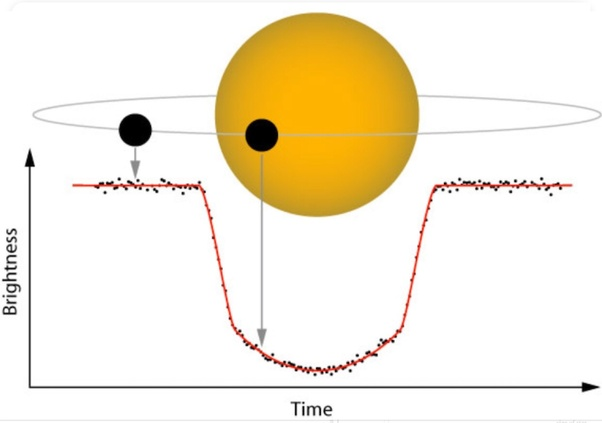

In [71]:
#sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (10, 10)})
#bar = ps_comp['discovery_method'].value_counts().plot(kind='bar')
#fig_1 = bar.get_figure()
#fig_1.savefig('bar_discovery_method')

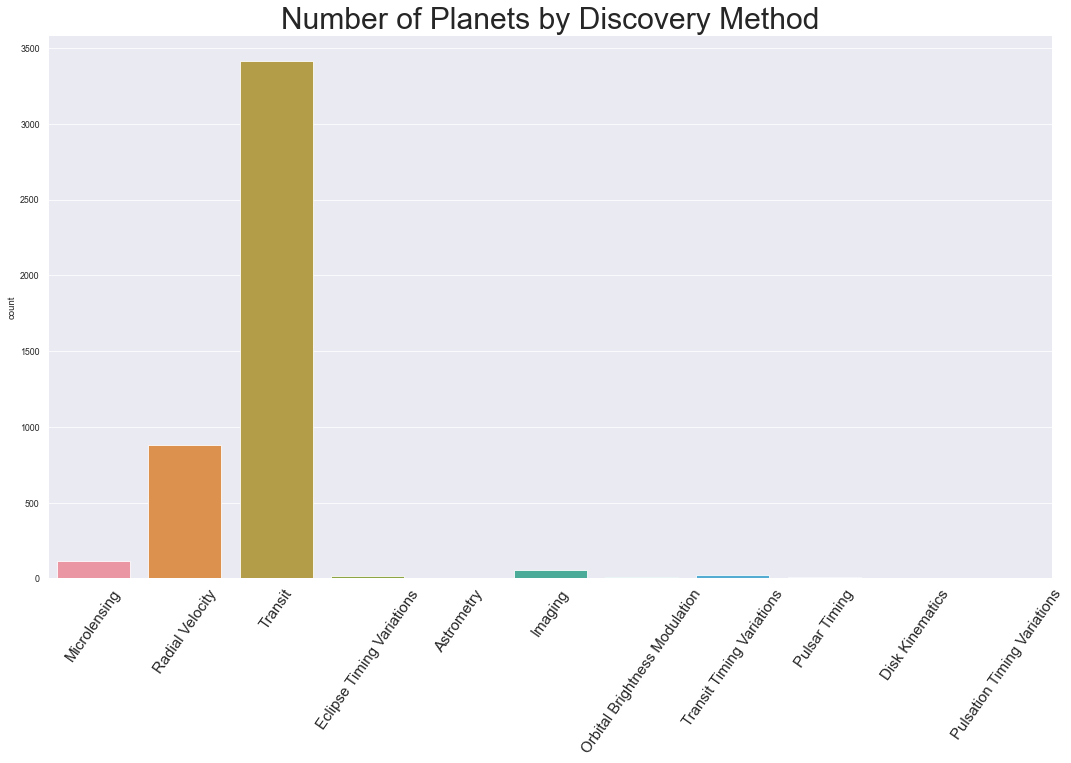

In [72]:
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (18, 10)})
ax = sns.countplot(x='discovery_method', data=ps_comp)

ax.set_title('Number of Planets by Discovery Method', fontsize=30)
ax.set(xlabel=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, size=15);

### Maybe a pie chart

**El de mayor periodo orbital**

In [73]:
ps_comp.sort_values('orbital_period', ascending=False).head(1)

,planet_name,hostname,sys_num_stars,sys_num_planet,discovery_method,discovery_year,discovery_telescope,orbital_period,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system,dist_system_ly
3489,COCONUTS-2 b,COCONUTS-2 A,1,1,Imaging,2021,3.2 m telescope,402000000.0,7506.0,12.442,1.11,2002.31896,6.3,NaN,3406.0,0.39,0.37,10.8864,35.511437


**El de menor periodo orbital**

In [74]:
ps_comp.sort_values('orbital_period').head(1)

,planet_name,hostname,sys_num_stars,sys_num_planet,discovery_method,discovery_year,discovery_telescope,orbital_period,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system,dist_system_ly
4162,PSR J1719-1438 b,PSR J1719-1438,1,1,Pulsar Timing,2011,64 m Parkes Radio Telescope,0.090706,0.0044,NaN,NaN,382.8,1.2,0.06,4500.0,NaN,1.4,1200.0,3914.4


In [75]:
#sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (10, 10)})
#bar_year = ps_comp['discovery_year'].value_counts().plot(kind='bar')
#fig_2 = bar_year.get_figure()
#fig_2.savefig('bar_year.png')

# Quieres colocarlos como xticks en la gráfica de abajo

In [76]:
ps_comp['discovery_year'].unique()

array([2020, 2013, 2016, 2018, 2010, 2005, 2007, 2008, 2012, 2015, 2017,
       2019, 2014, 2009, 1996, 2011, 2021, 2000, 2004, 1999, 2006, 2001,
       2002, 2003, 1998, 1992, 1995, 1997, 1994, 1989])

In [118]:
years = list(ps_comp['discovery_year'].unique())
years

[2020,
 2013,
 2016,
 2018,
 2010,
 2005,
 2007,
 2008,
 2012,
 2015,
 2017,
 2019,
 2014,
 2009,
 1996,
 2011,
 2021,
 2000,
 2004,
 1999,
 2006,
 2001,
 2002,
 2003,
 1998,
 1992,
 1995,
 1997,
 1994,
 1989]

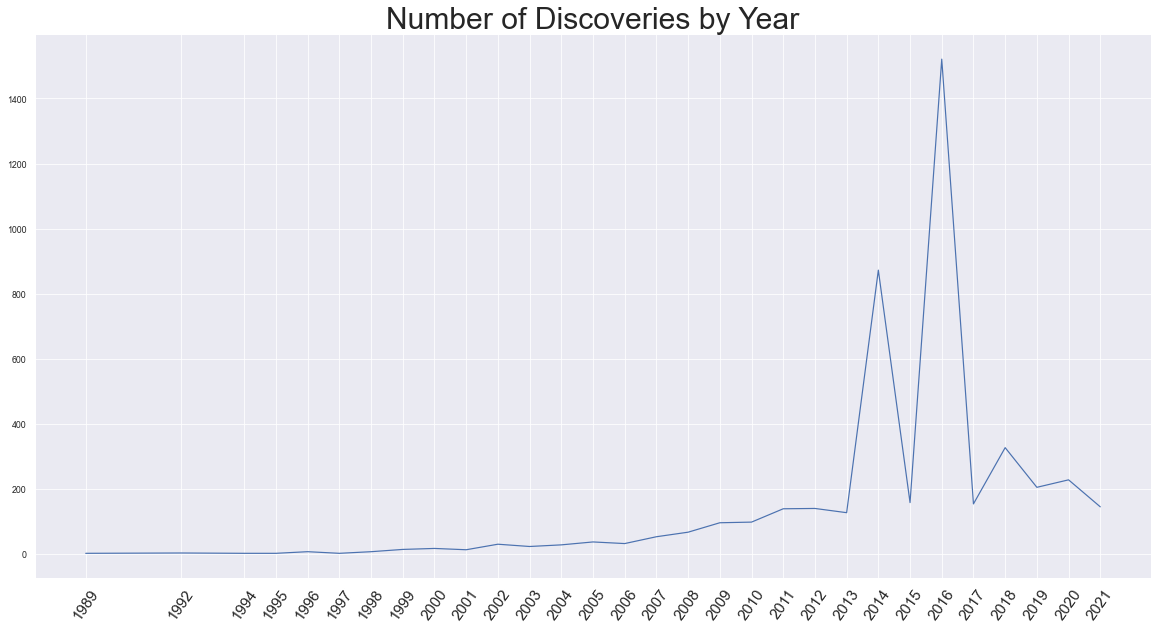

In [125]:
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (20, 10)})
ax = sns.lineplot(data=ps_comp['discovery_year'].value_counts())
ax.set_title('Number of Discoveries by Year', fontsize=30)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=55, size=15)
ax.set(ylabel=None);

In [78]:
correlation = ps_comp.corr()

<AxesSubplot:>

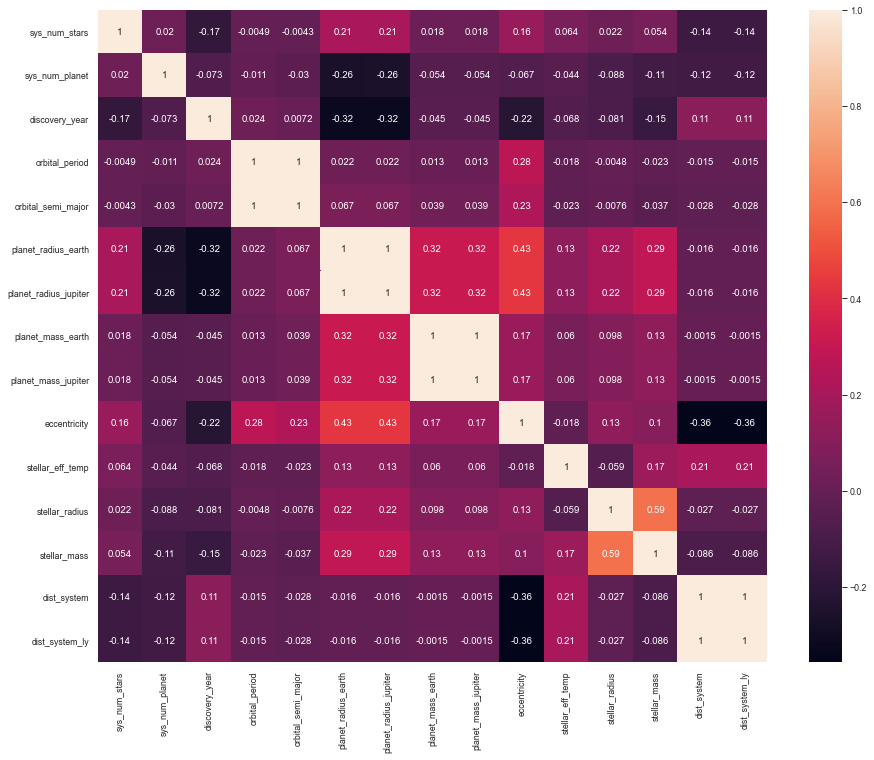

In [79]:
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 12)})
sns.heatmap(correlation, annot=True, )

In [84]:
ps_comp.sort_values('orbital_period', ascending=False)[:3]

,planet_name,hostname,sys_num_stars,sys_num_planet,discovery_method,discovery_year,discovery_telescope,orbital_period,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system,dist_system_ly
3489,COCONUTS-2 b,COCONUTS-2 A,1,1,Imaging,2021,3.2 m telescope,402000000.0,7506.0,12.442,1.11,2002.31896,6.3,NaN,3406.0,0.39,0.37,10.886400,35.511437
4434,CFHTWIR-Oph 98 b,CFHTWIR-Oph 98 A,1,1,Imaging,2021,2.4 m Hubble Space Telescope,8040000.0,200.0,20.849,1.86,2479.06157,7.8,NaN,2320.0,0.24,0.01,NaN,NaN
1515,Oph 11 b,Oph 11,1,1,Imaging,2006,8.19 m Gemini North Telescope,7300000.0,243.0,12.300,1.10,4449.62000,14.0,NaN,2375.0,0.23,0.02,136.165592,444.172161


### cambia la paleta y coloca un alpha

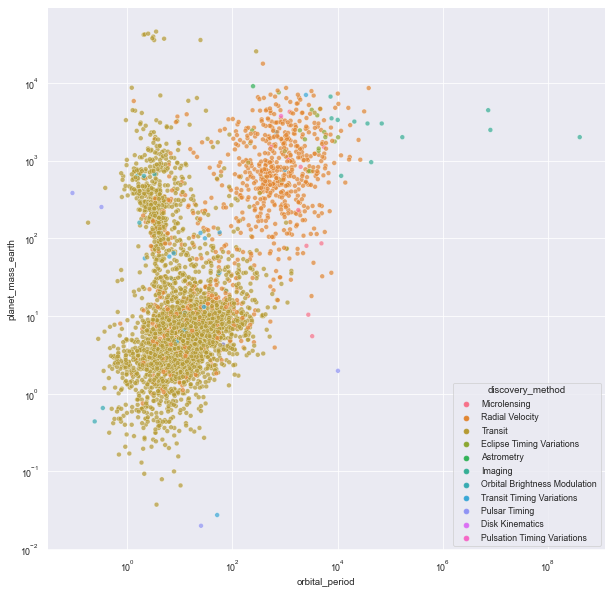

In [119]:
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (10, 10)})


ax = sns.scatterplot(x='orbital_period', y='planet_mass_earth', data=ps_comp, 
                     hue='discovery_method', alpha=0.7)

ax.set_xscale('log')
ax.set_yscale('log')

In [119]:
ps_comp.sort_values('orbital_period', ascending=False).head(5)

,planet_name,hostname,sys_num_stars,sys_num_planet,discovery_method,discovery_year,discovery_telescope,orbital_period,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system,dist_system_ly
3489,COCONUTS-2 b,COCONUTS-2 A,1,1,Imaging,2021,3.2 m telescope,402000000.0,7506.0,12.442,1.11,2002.31896,6.3,NaN,3406.00,0.39,0.37,10.886400,35.511437
4434,CFHTWIR-Oph 98 b,CFHTWIR-Oph 98 A,1,1,Imaging,2021,2.4 m Hubble Space Telescope,8040000.0,200.0,20.849,1.86,2479.06157,7.8,NaN,2320.00,0.24,0.01,NaN,NaN
1515,Oph 11 b,Oph 11,1,1,Imaging,2006,8.19 m Gemini North Telescope,7300000.0,243.0,12.300,1.10,4449.62000,14.0,NaN,2375.00,0.23,0.02,136.165592,444.172161
1988,HR 8799 b,HR 8799,1,4,Imaging,2008,8.19 m Gemini North Telescope,170000.0,68.0,13.000,1.20,2000.00000,7.0,NaN,7204.58,1.49,1.61,41.244100,134.538254
667,HR 8799 c,HR 8799,1,4,Imaging,2008,8.19 m Gemini North Telescope,69000.0,38.0,13.000,1.20,3000.00000,10.0,0.5,7204.58,1.49,1.61,41.244100,134.538254


<AxesSubplot:xlabel='planet_radius_jupiter', ylabel='Count'>

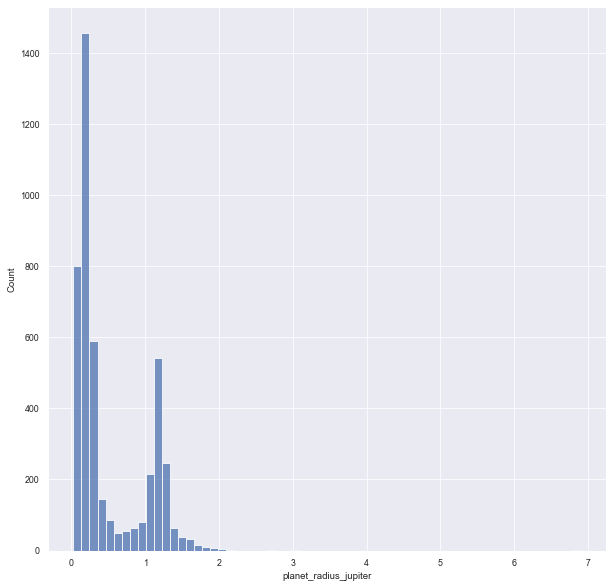

In [110]:
sns.histplot(ps_comp['planet_radius_jupiter'])


In [70]:
ps_comp.sort_values('planet_radius_jupiter', ascending=False).head(1)

,planet_name,hostname,sys_num_stars,sys_num_planet,discovery_method,discovery_year,discovery_telescope,orbital_period,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system,dist_system_ly
2798,HD 100546 b,HD 100546,1,1,Imaging,2014,8.2 m ESO VLT UT4 Yepun Telescope,NaN,53.0,77.342,6.9,239000.0,752.0,NaN,10500.0,1.85,2.4,109.677,357.766374


### Aqui quieres filtrar HD 100546 b y COCONUTS-2 b

In [89]:
ps_comp_filter = ps_comp.loc[(ps_comp['planet_name'] != 'HD 100546 b') & (ps_comp['planet_name'] != 'COCONUTS-2 b')]

In [92]:
ps_comp_filter.sort_values('planet_radius_jupiter', ascending=False)[:3]

,planet_name,hostname,sys_num_stars,sys_num_planet,discovery_method,discovery_year,discovery_telescope,orbital_period,orbital_semi_major,planet_radius_earth,planet_radius_jupiter,planet_mass_earth,planet_mass_jupiter,eccentricity,stellar_eff_temp,stellar_radius,stellar_mass,dist_system,dist_system_ly
224,GQ Lup b,GQ Lup,1,1,Imaging,2004,8.2 m ESO VLT UT4 Yepun Telescope,NaN,100.0,33.600,3.00,6356.00,20.0,NaN,4360.0,1.94,0.70,151.169,493.113278
3769,PDS 70 b,PDS 70,1,2,Imaging,2018,8.2 m ESO VLT UT3 Melipal Telescope,43500.0,20.0,30.488,2.72,953.49,3.0,0.19,3972.0,1.26,0.76,113.064,368.814768
1824,DH Tau b,DH Tau,1,1,Imaging,2004,8.2 m Subaru Telescope,NaN,330.0,30.264,2.70,3496.00,11.0,NaN,4371.0,0.27,0.33,134.846,439.867652


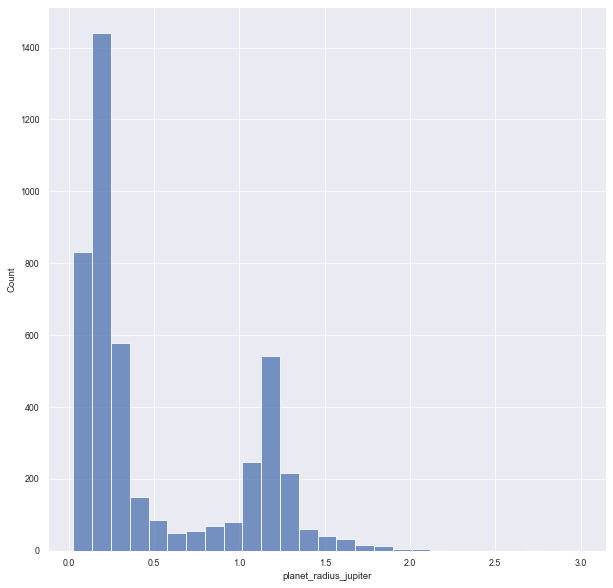

In [107]:
sns.histplot(ps_comp_filter['planet_radius_jupiter'], hue=ps_comp_filter[''])
ax.set_xscale('log')

https://ichi.pro/es/escala-logaritmica-como-trazarla-y-comprenderla-realmente-189749866469700

In [ ]:
def request_api():
    url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=ML&format=json'
    response = requests.get(url)
    return response

def df_micrlen(response):
    mlen = pd.DataFrame(response.json())
    return mlen

def renaming_cols(mlen):

    to_keep = ['pl_name', 'rastr', 'decstr', 'pl_masse', 'pl_massj', 'pl_orbsmax', 'sy_dist',
           'ml_dists', 'ml_xtimeein', 'ml_massratio', 'ml_magis', 'ml_radeinang']
    
    mlen = mlen[to_keep]
    
    new_names = ['planet_name',  'ra_event', 'dec_event', 'earth_massses', 'jupiter_masses', 
              'planet_orbmax', 'lens_distance', 'source_distance', 'einstein_cross_time', 'source_mag',
             'planet_star_mass_ratio', 'angular_einstein_radius']
    
    old_names = [name for name in mlen.columns]
    
    dict_names = (dict(zip(old_names, new_names)))
    
    mlen = mlen.rename(columns=dict_names)
    
    mlen = mlen.drop_duplicates('planet_name')
    
    return mlen

def wranglig(mlen):
   
    mlen['lens_distance_ly'] = mlen['lens_distance'] * 3.262
    
    mlen['source_distance_ly'] = mlen['source_distance'] * 3.262
    
    mlen['ra_event'] = mlen['ra_event'].str.replace(r'[hm]', ' ', regex=True).str.replace(r's', '', regex=True)
    
    mlen['ra_event'] = mlen['ra_event'].str.strip()
    
    mlen['dec_event'] = mlen['dec_event'].str.replace(r'[dm]', ' ', regex=True).str.replace(r's', '', regex=True)
    
    mlen.to_csv('microlensing_data.csv', index=False)
    
    return mlen


def request_api_second():
    url = 'https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_telescope,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,st_spectype,st_teff,st_rad,st_mass,sy_dist+from+pscomppars&format=json'
    response_2 = requests.get(url)
    return response_2
    
def df_pscomp(response):
    ps_comp = pd.DataFrame(response.json())
    return ps_comp

def renaming_cols_ps_comp(ps_comp):
    
    ps_comp = ps_comp.drop(columns='st_spectype')
    
    new_names_ps = ['planet_name', 'hostname', 'sys_num_stars', 'sys_num_planet', 'discovery_method', 
                'discovery_year', 'discovery_telescope', 'orbital_period', 'orbital_semi_major', 'planet_radius_earth',
               'planet_radius_jupiter', 'planet_mass_earth', 'planet_mass_jupiter', 'eccentricity', 'stellar_eff_temp',
               'stellar_radius', 'stellar_mass', 'dist_system']
    
    old_names_ps = [colum for colum in ps_comp.columns]
    
    dict_ps = dict(zip(old_names_ps, new_names_ps))
    
    ps_comp = ps_comp.rename(columns=dict_ps)
    
    return ps_comp

    
def wranglig_pscmop(ps_comp):
    
    ps_comp['dist_system_ly'] = ps_comp['dist_system'] * 3.262
    
    ps_comp.to_csv('ps_comp_data.csv', index=False)
    
    return ps_comp


def df_psmlen(ps_comp):
    
    ps_mlen = ps_comp.loc[ps_comp['discovery_method'] == 'Microlensing']
    
    return ps_mlen


def merge(ps_mlen, mlen):
    
    merged = pd.merge(mlen, ps_mlen, on='planet_name')
    
    merged = merged.drop(columns=['earth_massses', 'jupiter_masses', 'orbital_period', 'stellar_eff_temp', 'stellar_radius', 'eccentricity'], inplace=True)
    
    return merged


def analyze(ps_comp):
    
    hight_oper = ps_comp.sort_values('orbital_period', ascending=False).head(1)
    
    low_oper = ps_comp.sort_values('orbital_period').head(1)
    
    hight_oper.to_csv('hight_oper.csv', index=False)
    
    low_oper.to_csv('low_oper.csv', index=False)
    
    
def visualize_bar(ps_comp):
    
    bar = ps_comp['discovery_method'].value_counts().plot(kind='bar')
    
    bar_year = ps_comp['discovery_year'].value_counts().plot(kind='bar')
    
    fig_1 = bar.get_figure()
    
    fig_1.savefig('bar_discovery_method.png')
    
    fig_2 = bar_year.get_figure()
    
    fig_2.savefig('bar_year.png')
    

if __name__ == '__main__':
    request = request_api()
    df_1 = df_micrlen(request)
    df_re = renaming_cols(df_1)
    wrangle = wranglig(df_re)
    request_second = request_api_second()
    df_2 = df_pscomp(request_second)
    df_2_re = renaming_cols_ps_comp(df_2)
    wrangle_df2 = wranglig_pscmop(df_2_re)
    df_3 = df_psmlen(wrangle_df2)
    merge = merge(df_3, df_re)
    analysis = analyze(df_3)
    visual = visualize_bar(df_2_re)

Proyects ideas:
Does the number of planets in a system depends on the star (temperature, radius, Age)
What are the planets with the older stars
Percentage by method
with filters by method and label of the name of each planet (tableau)
- planet mass vs orbital period
- planet mass vs radius
planet with the biggest radius compare with earth and jupiter
planet with the biggest mass compare with earth and jupiter
planet with the shortest obital period compare with the orbital period of the earth (both rotating)
planet with the longest orbital period compare with the orbital period of the earth (both rotating)
how many stars is orbiting the exoplanet